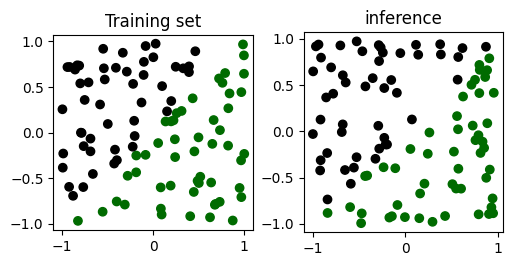

In [251]:
import numpy as np
import matplotlib.pyplot as plt


def target_circle(len,dim,sigma, r=0.5):	
    target_set = {}
    x = np.zeros([len,dim])
    for i in range(len):	
        for j in range(dim):
            x[i,j] = np.random.uniform(-sigma,sigma)            
        if np.sqrt(np.sum(x[i,:]**2))  < r:
            label = 1
        else:
            label = 0
        target_set[i] = x[i,:],label
    return  target_set

def target_line(len,dim,sigma):
    target_set = {}
    x = np.zeros([len,dim])
    for i in range(len):	
        for j in range(dim):
            x[i,j] = np.random.uniform(-sigma,sigma)
        if x[i,0] > x[i,1]:
            label = 1
        else:
            label = 0
        target_set[i] = x[i,:],label
    return  target_set

###################################
def init_weights(dim):
        return np.random.normal(-1,1,dim)

def activation(x):
    return np.where(x > 0, 1, 0)  

def guess(input, weights):        
    z = np.dot(input,weights) ## Sum         
    return activation(z)
###################################

dim = 2 # dimension of the input space
n_train = 100 # number of points for training set
t = target_line(dim=2,len=n_train, sigma=1) # training 

#### training
n_epoch = 300
lr = 0.001

input = np.array([t[i][0] for i in range(len(t))])
weights = init_weights(dim)
for _ in range(n_epoch):  ## training epochs        
    for j in range(len(t)): ## training set            
        input = t[j][0]
        label = t[j][1]
        g = guess(input,weights) ## 
        L = label - g ## Loss                        
        weights +=  L * input * lr ## Weight update
            
#### testing
len_test = 100
x_test = np.random.uniform(-1, 1, (len_test, dim))  # Generates all points at once
infer = guess(x_test, weights) ## inference

###############
#### Plot  ####
###############

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_axes([0,0,0.4,0.4])
ax2 = fig.add_axes([0.5,0,0.4,0.4])

ax1.scatter(   *zip(*[(t[i][0][0], t[i][0][1]) for i in range(len(t))] ),             
            c=[[0,  0.42 * t[i][1], 0] for i in range(len(t))] )
ax1.set_aspect('equal')
ax1.title.set_text('Training set')        

ax2.scatter(   *zip(*[(x_test[i][0], x_test[i][1]) for i in range(len_test)] ),             
            c=[[0,  0.42 * infer[i], 0] for i in range(len_test)] )
ax2.set_aspect('equal')
ax2.title.set_text('inference')        



1

TypeError: '<' not supported between instances of 'list' and 'int'